# Курсовой проект по дисциплине "Вычислительная математика"(XIII.11.1)

### Задача
Уравнение имеет вид: $$ \frac{\partial u}{\partial t}=\frac{\partial}{\partial x }a u^\alpha\frac{\partial u}{\partial x}+q(x)$$ $$ -\alpha_1 u_x(0,t) + \beta_1 u(0,t)=f_1(t) $$ $$ \alpha_2 u_x(X,t) + \beta_2 u(X,t)=f_2(t) $$ $$ u(x,0)=g(x), $$ $$ \alpha_i \geqslant 0, \beta_i \geqslant 0, \alpha_i+\beta_i > 0, i = 1,2 $$
используется следующая разностная схема $$ \frac{y^{n+1}_m - y^{n}_{m}}{\tau} = \frac{1}{h}(k_{m+\frac{1}{2}}\frac{y^{n+1}_{m+1} - y^{n+1}_{m}}{h} - k_{m-\frac{1}{2}}\frac{y^{n+1}_{m} - y^{n+1}_{m-1}}{h}) $$

Предлагается использовать различные способы определения $ k_{m+\frac{1}{2}} $:

$ 1) \quad k_{m+\frac{1}{2}} = \frac{a}{2} ({y^{n}_{m}}^\alpha + {y^{n}_{m+1}}^\alpha)$ $$$$
$ 2) \quad k_{m+\frac{1}{2}} = a(\frac{{y^{n}_{m}} + {y^{n}_{m+1}}}{2})^\alpha$ $$$$
$ 3) \quad k_{m+\frac{1}{2}} = a(\frac{2{y^{n}_{m}} {y^{n}_{m+1}}}{{y^{n}_{m}}+{y^{n}_{m+1}}})^\alpha$ $$$$
$ 4) \quad k_{m+\frac{1}{2}} = 2a(\frac{{y^{n}_{m}}^\alpha {y^{n}_{m+1}}^\alpha}{{y^{n}_{m}}^\alpha+{y^{n}_{m+1}}^\alpha})$ 

In [2]:
# Не забудьте исполнить эту ячейку нажатием "Ctrl+Enter" или кнопкой "Run" в верхней части экрана
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

class Solution:
    def __init__(self, x_new, t_new):
        self.x = x_new
        self.t = t_new
        self.u = 0.0
    
    def print_solution(self):
        print('u(' , self.x , ', ' , self.t ,') =' , self.u)

#Определили 1 и 2 варианты вычисления коэффициентов k
def k1(y, y_next):
    return a/2.0*(y**alpha+y_next**alpha)
def k2(y, y_next):
    return a*((y+y_next)/2.0)**alpha
def k3(y, y_next):
    if(y+y_next == 0):
        return 0
    return a*(2*y*y_next/(y+y_next))**alpha
def k4(y, y_next):
    denomin = y**alpha+y_next**alpha
    if(denomin == 0):
        return 0
    return 2*a*((y*y_next)**alpha)/denomin

def solve_equation(t_n, x_n, t_step, x_step, n, n_steps):
    t_left = 0
    x_left = 0
    t_right = t_left+t_step*t_n
    x_right = x_left+x_step*x_n
    #Определили расчетную сетку
    solution = []
    for j in np.arange(t_left,t_right + t_step,t_step):
        sol_temp = []
        for i in np.arange(x_left,x_right + x_step,x_step):
            sol_temp.append(Solution(i,j))
        solution.append(sol_temp)

    #Задали начальные данные
    for i in np.arange(0, t_n+1):
        solution[i][0].u = f1(t_left+i*t_step)
        solution[i][x_n].u = f2(t_left+i*t_step)
    for i in np.arange(0, x_n+1):
        solution[0][i].u = g(x_left+i*x_step)


    for i in np.arange(1, t_n+1):
        #Прямой ход прогонки
        coefs1 = []
        coefs2 = []
        coefs1.append(-(alpha1/x_step)/(beta1-alpha1/x_step))
        coefs2.append(f1(i*t_step)/(beta1-alpha1/x_step))
        
        if(n == 1):
            for j in np.arange(1,x_n):
                coefs1.append(-(k1(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k1(solution[i-1][j].u,solution[i-1][j+1].u)+k1(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k1(solution[i-1][j].u,solution[i-1][j+1].u)+k1(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 2):
            for j in np.arange(1,x_n):
                coefs1.append(-(k2(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k2(solution[i-1][j].u,solution[i-1][j+1].u)+k2(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k2(solution[i-1][j].u,solution[i-1][j+1].u)+k2(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 3):
            for j in np.arange(1,x_n):
                coefs1.append(-(k3(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k3(solution[i-1][j].u,solution[i-1][j+1].u)+k3(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k3(solution[i-1][j].u,solution[i-1][j+1].u)+k3(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 4):
            for j in np.arange(1,x_n):
                coefs1.append(-(k4(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k4(solution[i-1][j].u,solution[i-1][j+1].u)+k4(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k4(solution[i-1][j].u,solution[i-1][j+1].u)+k4(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        

        coefs2.append((f2(t_left+i*t_step)+alpha2/x_step*coefs2[-1]) / (alpha2/x_step+beta2-alpha2/x_step*coefs1[-1]))

        #Обратный ход прогонки
        solution[i][x_n].u = coefs2[-1]
        for j in np.arange(1,x_n):
            solution[i][x_n-j].u = solution[i][x_n-j+1].u*coefs1[-j]+coefs2[-1-j]
            
        #Расчет через коэффициент теплопроводности с верхнего слоя
        for t in np.arange(0,n_steps):
            #Прямой ход прогонки
            coefs1 = []
            coefs2 = []
            coefs1.append(-(alpha1/x_step)/(beta1-alpha1/x_step))
            coefs2.append(f1(i*t_step)/(beta1-alpha1/x_step))

            if(n == 1):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k1(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k1(solution[i][j].u,solution[i][j+1].u)+k1(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k1(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k1(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k1(solution[i][j].u,solution[i][j+1].u)+k1(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k1(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))
            elif(n == 2):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k2(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k2(solution[i][j].u,solution[i][j+1].u)+k2(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k2(solution[i][j].u,solution[i][j+1].u)+k2(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k2(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))
            elif(n == 3):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k3(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k3(solution[i][j].u,solution[i][j+1].u)+k3(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k3(solution[i][j].u,solution[i][j+1].u)+k3(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k3(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))
            elif(n == 4):
                for j in np.arange(1,x_n):
                    coefs1.append(-(k4(solution[i][j].u,solution[i][j+1].u)/x_step**2)/
                                  (-(k4(solution[i][j].u,solution[i][j+1].u)+k4(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-1]))

                    coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i)*t_step,x_left+j*x_step)-
                                   k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs2[-1])/
                                  (-(k4(solution[i][j].u,solution[i][j+1].u)+k4(solution[i][j].u,solution[i][j-1].u))/
                                   x_step**2-1/t_step + k4(solution[i][j].u,solution[i][j-1].u)/x_step**2*coefs1[-2]))


            coefs2.append((f2(t_left+i*t_step)+alpha2/x_step*coefs2[-1]) / (alpha2/x_step+beta2-alpha2/x_step*coefs1[-1]))

            #Обратный ход прогонки
            solution[i][x_n].u = coefs2[-1]
            for j in np.arange(1,x_n):
                solution[i][x_n-j].u = solution[i][x_n-j+1].u*coefs1[-j]+coefs2[-1-j]
    
    return solution

def solve_equation_crank_nicolson(t_n, x_n, t_step, x_step, n, n_steps, ksi):
    t_left = 0
    x_left = 0
    t_right = t_left+t_step*t_n
    x_right = x_left+x_step*x_n
    #Определили расчетную сетку
    solution = []
    for j in np.arange(t_left,t_right + t_step,t_step):
        sol_temp = []
        for i in np.arange(x_left,x_right + x_step,x_step):
            sol_temp.append(Solution(i,j))
        solution.append(sol_temp)

    #Задали начальные данные
    for i in np.arange(0, t_n+1):
        solution[i][0].u = f1(t_left+i*t_step)
        solution[i][x_n].u = f2(t_left+i*t_step)
    for i in np.arange(0, x_n+1):
        solution[0][i].u = g(x_left+i*x_step)


    for i in np.arange(1, t_n+1):
        #Прямой ход прогонки
        coefs1 = []
        coefs2 = []
        coefs1.append(-(alpha1/x_step)/(beta1-alpha1/x_step))
        coefs2.append(f1(i*t_step)/(beta1-alpha1/x_step))
        
        if(n == 1):
            for j in np.arange(1,x_n):
                coefs1.append(-(k1(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k1(solution[i-1][j].u,solution[i-1][j+1].u)+k1(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k1(solution[i-1][j].u,solution[i-1][j+1].u)+k1(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k1(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 2):
            for j in np.arange(1,x_n):
                coefs1.append(-(k2(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k2(solution[i-1][j].u,solution[i-1][j+1].u)+k2(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k2(solution[i-1][j].u,solution[i-1][j+1].u)+k2(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k2(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 3):
            for j in np.arange(1,x_n):
                coefs1.append(-(k3(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k3(solution[i-1][j].u,solution[i-1][j+1].u)+k3(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k3(solution[i-1][j].u,solution[i-1][j+1].u)+k3(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k3(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        elif(n == 4):
            for j in np.arange(1,x_n):
                coefs1.append(-(k4(solution[i-1][j].u,solution[i-1][j+1].u)/x_step**2)/
                              (-(k4(solution[i-1][j].u,solution[i-1][j+1].u)+k4(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-1]))

                coefs2.append((-solution[i-1][j].u/t_step-q(t_left+(i-1)*t_step,x_left+j*x_step)-
                               k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs2[-1])/
                              (-(k4(solution[i-1][j].u,solution[i-1][j+1].u)+k4(solution[i-1][j].u,solution[i-1][j-1].u))/
                               x_step**2-1/t_step + k4(solution[i-1][j].u,solution[i-1][j-1].u)/x_step**2*coefs1[-2]))
        

        coefs2.append((f2(t_left+i*t_step)+alpha2/x_step*coefs2[-1]) / (alpha2/x_step+beta2-alpha2/x_step*coefs1[-1]))

        #Обратный ход прогонки
        solution[i][x_n].u = coefs2[-1]
        for j in np.arange(1,x_n):
            solution[i][x_n-j].u = solution[i][x_n-j+1].u*coefs1[-j]+coefs2[-1-j]
            
        #Расчет через коэффициент теплопроводности с верхнего слоя
        for t in np.arange(0,n_steps):
            #Прямой ход прогонки
            coefs1 = []
            coefs2 = []
            coefs1.append(-(alpha1/x_step)/(beta1-alpha1/x_step))
            coefs2.append(f1(i*t_step)/(beta1-alpha1/x_step))

            if(n == 1):
                for j in np.arange(1,x_n):
                    k_next = k1(solution[i-1][j].u,solution[i-1][j+1].u)
                    k_prev = k1(solution[i-1][j].u,solution[i-1][j-1].u)
                    
                    b_i = -ksi*(k1(solution[i][j].u,solution[i][j+1].u)/x_step**2)
                    c_i = -ksi*(k1(solution[i][j].u,solution[i][j+1].u)+k1(solution[i][j].u,solution[i][j-1].u))/x_step**2-1/t_step
                    a_i =  -ksi*k1(solution[i][j].u,solution[i][j-1].u)/x_step**2
                    f_i = (-solution[i-1][j].u/t_step-ksi*q(t_left+(i)*t_step,x_left+j*x_step)
                           -(1-ksi)*q(t_left+(i-1)*t_step,x_left+j*x_step)
                           -(1-ksi)*(k_next*(solution[i-1][j+1].u-solution[i-1][j].u)
                                     -k_prev*(solution[i-1][j].u-solution[i-1][j-1].u))/x_step**2)
                    coefs1.append(b_i/(c_i - a_i*coefs1[-1]))
                    coefs2.append((f_i+a_i*coefs2[-1])/(c_i - a_i*coefs1[-2]))
            elif(n == 2):
                for j in np.arange(1,x_n):
                    k_next = k2(solution[i-1][j].u,solution[i-1][j+1].u)
                    k_prev = k2(solution[i-1][j].u,solution[i-1][j-1].u)
                    
                    b_i = -ksi*(k2(solution[i][j].u,solution[i][j+1].u)/x_step**2)
                    c_i = -ksi*(k2(solution[i][j].u,solution[i][j+1].u)+k2(solution[i][j].u,solution[i][j-1].u))/x_step**2-1/t_step
                    a_i =  -ksi*k2(solution[i][j].u,solution[i][j-1].u)/x_step**2
                    f_i = (-solution[i-1][j].u/t_step-ksi*q(t_left+(i)*t_step,x_left+j*x_step)
                           -(1-ksi)*q(t_left+(i-1)*t_step,x_left+j*x_step)
                           -(1-ksi)*(k_next*(solution[i-1][j+1].u-solution[i-1][j].u)
                                     -k_prev*(solution[i-1][j].u-solution[i-1][j-1].u))/x_step**2)
                    coefs1.append(b_i/(c_i - a_i*coefs1[-1]))
                    coefs2.append((f_i+a_i*coefs2[-1])/(c_i - a_i*coefs1[-2]))
            elif(n == 3):
                for j in np.arange(1,x_n):
                    k_next = k3(solution[i-1][j].u,solution[i-1][j+1].u)
                    k_prev = k3(solution[i-1][j].u,solution[i-1][j-1].u)
                    
                    b_i = -ksi*(k3(solution[i][j].u,solution[i][j+1].u)/x_step**2)
                    c_i = -ksi*(k3(solution[i][j].u,solution[i][j+1].u)+k3(solution[i][j].u,solution[i][j-1].u))/x_step**2-1/t_step
                    a_i =  -ksi*k3(solution[i][j].u,solution[i][j-1].u)/x_step**2
                    f_i = (-solution[i-1][j].u/t_step-ksi*q(t_left+(i)*t_step,x_left+j*x_step)
                           -(1-ksi)*q(t_left+(i-1)*t_step,x_left+j*x_step)
                           -(1-ksi)*(k_next*(solution[i-1][j+1].u-solution[i-1][j].u)
                                     -k_prev*(solution[i-1][j].u-solution[i-1][j-1].u))/x_step**2)
                    coefs1.append(b_i/(c_i - a_i*coefs1[-1]))
                    coefs2.append((f_i+a_i*coefs2[-1])/(c_i - a_i*coefs1[-2]))
            elif(n == 4):
                for j in np.arange(1,x_n):
                    k_next = k4(solution[i-1][j].u,solution[i-1][j+1].u)
                    k_prev = k4(solution[i-1][j].u,solution[i-1][j-1].u)
                    
                    b_i = -ksi*(k4(solution[i][j].u,solution[i][j+1].u)/x_step**2)
                    c_i = -ksi*(k4(solution[i][j].u,solution[i][j+1].u)+k4(solution[i][j].u,solution[i][j-1].u))/x_step**2-1/t_step
                    a_i =  -ksi*k4(solution[i][j].u,solution[i][j-1].u)/x_step**2
                    f_i = (-solution[i-1][j].u/t_step-ksi*q(t_left+(i)*t_step,x_left+j*x_step)
                           -(1-ksi)*q(t_left+(i-1)*t_step,x_left+j*x_step)
                           -(1-ksi)*(k_next*(solution[i-1][j+1].u-solution[i-1][j].u)
                                     -k_prev*(solution[i-1][j].u-solution[i-1][j-1].u))/x_step**2)
                    coefs1.append(b_i/(c_i - a_i*coefs1[-1]))
                    coefs2.append((f_i+a_i*coefs2[-1])/(c_i - a_i*coefs1[-2]))

            coefs2.append((f2(t_left+i*t_step)+alpha2/x_step*coefs2[-1]) / (alpha2/x_step+beta2-alpha2/x_step*coefs1[-1]))

            #Обратный ход прогонки
            solution[i][x_n].u = coefs2[-1]
            for j in np.arange(1,x_n):
                solution[i][x_n-j].u = solution[i][x_n-j+1].u*coefs1[-j]+coefs2[-1-j]
    
    return solution

def plot_3d(ax1, ax2, solution, t_n, x_n, n, front_frequency):
    X1 = []
    Y1 = []
    Z1 = []
    for i in solution:
        for j in i:
            X1.append(j.x)
            Y1.append(j.t)
            Z1.append(j.u)

    ax1.plot_trisurf(Y1, X1, Z1, linewidth=0.2, antialiased=True)
    ax1.set_title(str(n)+' вариант')
    ax1.set_xlabel('t axis')
    ax1.set_ylabel('x axis')
    ax1.set_zlabel('u axis')
    
    for i in np.arange(0,t_n,front_frequency):
        ax2.plot(X1[i*(x_n+1):(i+1)*(x_n+1)],Z1[i*(x_n+1):(i+1)*(x_n+1)], label='t = ' + str(i*t_step))
    ax2.set_xlabel('x')
    ax2.set_ylabel('u')
    ax2.set_title(str(n)+' вариант')

    return

def plot_error(ax, solution, t_n, x_n, n, t_step, x_step, front_frequency):
    X1 = []
    Y1 = []
    Z1 = []
    x_left = 0
    t_left = 0
    X_exact = []
    Y_exact = []
    Z_exact = []

    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            x0 = x_left+x_step*i
            t0 = t_left+t_step*j
            Y_exact.append(t0)
            X_exact.append(x0)
            Z_exact.append(exact_solution(t0, x0))
    
    for i in solution:
        for j in i:
            X1.append(j.x)
            Y1.append(j.t)
            Z1.append(j.u)
    
    for i in np.arange(0,t_n,front_frequency):
        ax.plot(X1[i*(x_n+1):(i+1)*(x_n+1)],np.abs(
            np.array(Z1[i*(x_n+1):(i+1)*(x_n+1)])-np.array(Z_exact[i*(x_n+1):(i+1)*(x_n+1)])), label='t = ' + str(i*t_step))
        ax.set_xlabel('x')
        ax.set_ylabel('u')
        ax.set_title('погрешности '+str(n)+' варианта')
    
    return

def plot_3d_exact_solution(ax1, ax2, t_n, x_n, t_step, x_step, front_frequency):
    x_left = 0
    t_left = 0
    X_exact = []
    Y_exact = []
    Z_exact = []

    for j in np.arange(0,t_n+1):
        for i in np.arange(0,x_n+1):
            x0 = x_left+x_step*i
            t0 = t_left+t_step*j
            Y_exact.append(t0)
            X_exact.append(x0)
            Z_exact.append(exact_solution(t0, x0))

    ax1.plot_trisurf(Y_exact, X_exact, Z_exact, linewidth=0.2, antialiased=True)
    ax1.set_title('точное решение')
    ax1.set_xlabel('t axis')
    ax1.set_ylabel('x axis')
    ax1.set_zlabel('u axis')
    
    for i in np.arange(0,t_n,front_frequency):
        ax2.plot(X_exact[i*(x_n+1):(i+1)*(x_n+1)],Z_exact[i*(x_n+1):(i+1)*(x_n+1)], label='t = ' + str(i*t_step))
    ax2.set_xlabel('x')
    ax2.set_ylabel('u')
    ax2.set_title('точное решение')
    
    return

## Здесь вы можете решить любую задачу рассматриваемого вида.

$$ \frac{\partial u}{\partial t}=\frac{\partial}{\partial x }a u^\alpha\frac{\partial u}{\partial x}+q(x)$$ $$ -\alpha_1 u_x(0,t) + \beta_1 u(0,t)=f_1(t), \quad t\in(0,T) $$ $$ \alpha_2 u_x(X,t) + \beta_2 u(X,t)=f_2(t), \quad t\in(0,T) $$ $$ u(x,0)=g(x), \quad x\in(0,X), $$ $$ \alpha_i \geqslant 0, \beta_i \geqslant 0, \alpha_i+\beta_i > 0, i = 1,2 $$

Определите ниже все константы и функции. Имена переменных и названия функций НЕ МЕНЯТЬ. К изменению доступна только ОДНА ячейка ниже. После занесения значений исполните ячейку нажатием "Ctrl+Enter" или кнопкой "Run" в верхней части экрана. Перед запуском убедитесь, что вы исполнили ячейку с кодом выше с подключением библиотек и определением расчетных функций. Ниже также представлены доступные функции. Чтобы вернуть значение функции напишите np."название функции"("аргумент функции"). Чтобы вывести расчеты и графики исполните последнюю ячейку с кодом.

<img src='exp1.png' style='width:600px;height:150px'>
<img src='exp2.png' style='width:600px;height:150px'>
<img src='exp3.png' style='width:600px;height:150px'>

In [11]:
#Здесь определите все параметры задачи
a = 1
alpha = 2

alpha1 = -1
beta1 = 1

alpha2 = 1
beta2 = 1

X = 1
T = 1

x_step = 0.03            # шаг сетки по координате
t_step = 0.01           # шаг сетки по времени
front_frequency = 10    # частота линий фронта на графике
n_steps = 1            # число циклов уточняющей прогонки
ksi = 0.5                # параметр схемы
n = 3                    # число от 1 до 4 - номер способа расчета коэффициента теплопроводности

def f1(t):
    return np.sin(t)
def f2(t):
    return np.cos(t)
def g(x):
    return x**2
def q(t,x):
    return np.exp((x+t)/2)

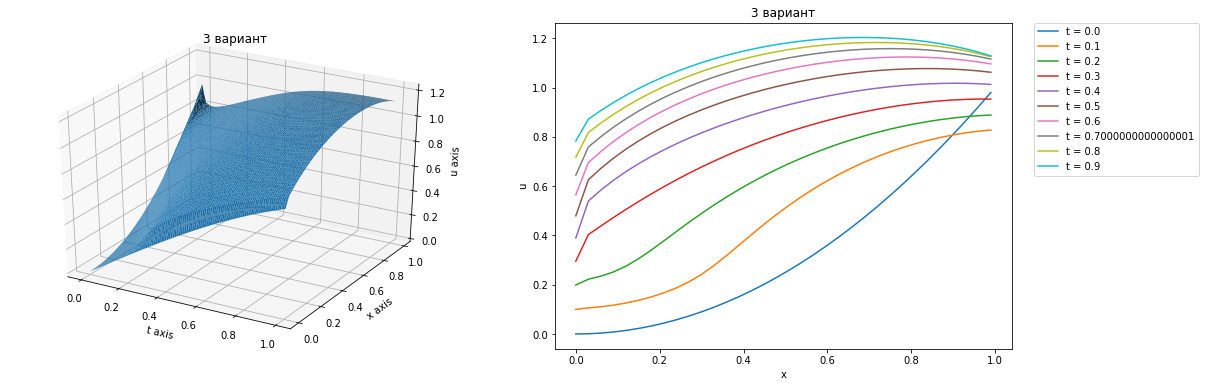

In [12]:
# В этой ячейке ничего не менять. Исполнить после определения всех параметров задачи
x_left = 0
x_right = X
x_n = int((x_right-x_left)/x_step)

t_left = 0
t_right = T
t_n = int((t_right-t_left)/t_step)

fig1 = plt.figure(figsize=(18,6))


solution = solve_equation_crank_nicolson(t_n, x_n, t_step, x_step,n, n_steps, ksi)
ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
ax2 = fig1.add_subplot(1, 2, 2)
plot_3d(ax1, ax2, solution, t_n, x_n, n, front_frequency)

ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()